In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import graphviz
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas_profiling as pp
from sklearn.metrics import accuracy_score,f1_score,precision_score,roc_auc_score,recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

C:\Users\devendra\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [3]:
data=pd.read_csv(url)
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
data.shape
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Exploratory Data Analysis

1.Variable Identification

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2.Univariate Analysis

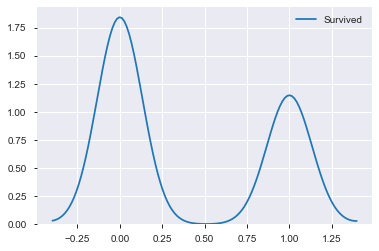

In [6]:
sns.kdeplot(data=data["Survived"])

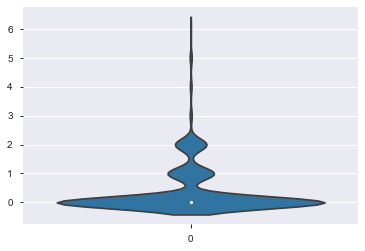

In [7]:
sns.violinplot(data=data["Parch"])

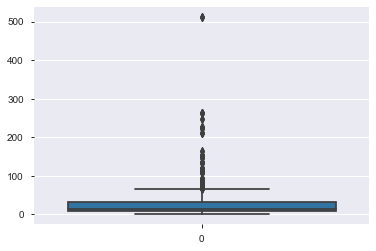

In [8]:
sns.boxplot(data=data["Fare"])

2.Bivariate Analysis

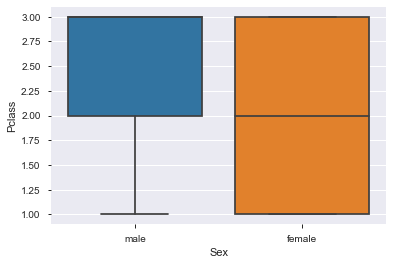

In [9]:
sns.boxplot(x=data["Sex"],y=data["Pclass"])

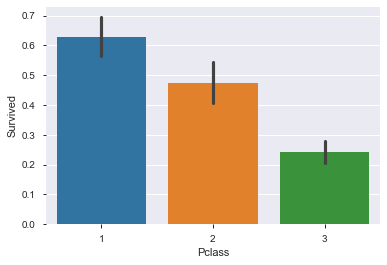

In [10]:
sns.barplot(x=data["Pclass"],y=data["Survived"])

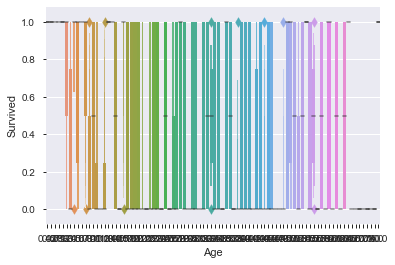

In [11]:
sns.boxenplot(x=data["Age"],y=data["Survived"])

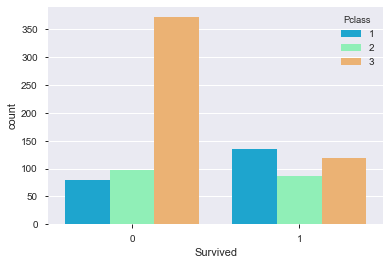

In [12]:
sns.countplot(x="Survived",hue="Pclass",data=data,palette='rainbow')

In [13]:
pp.ProfileReport(data)

3.Multivariate Analysis

C:\Users\devendra\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\devendra\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


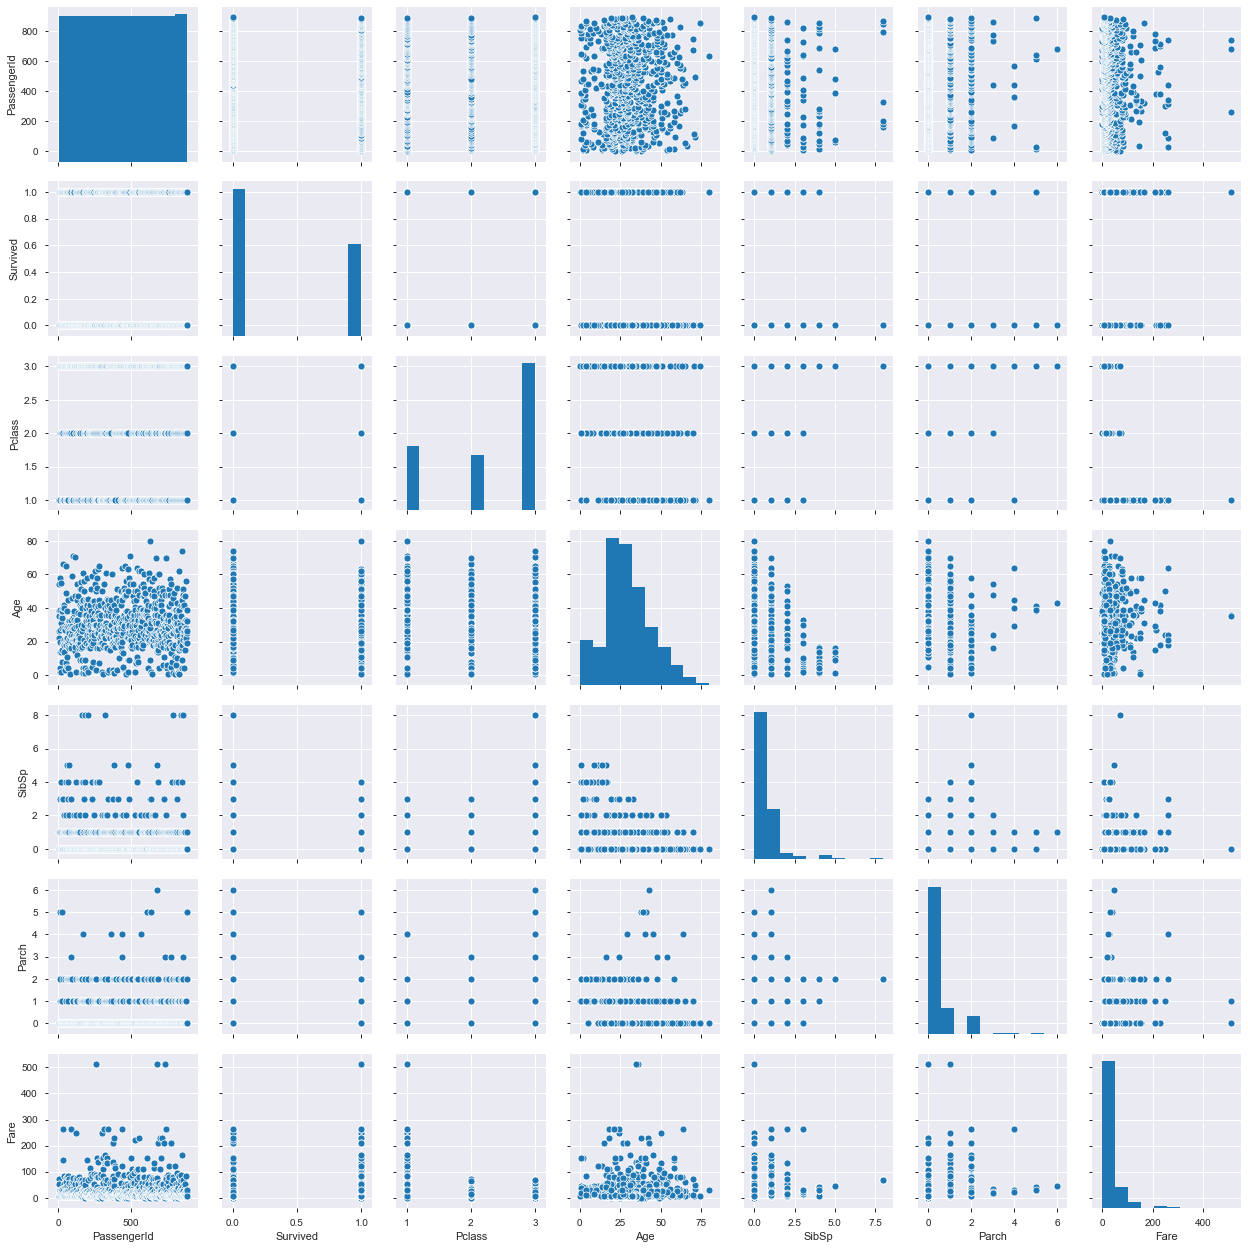

In [14]:
# Multivariate Analysis
sns.pairplot(data)

4.Missing Value

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\devendra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\devendra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


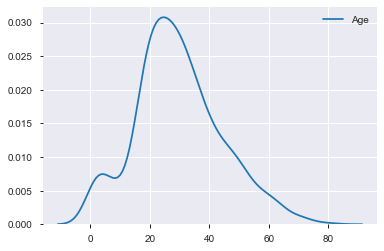

In [16]:
sns.kdeplot(data=data["Age"])

In [17]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:

si =SimpleImputer(strategy="most_frequent")
data["Cabin"] = si.fit_transform(data[["Cabin"]])

In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [21]:
data.select_dtypes("object").head(2) # to check the Categorical data.

Name     Sex     Ticket  \
0                            Braund, Mr. Owen Harris    male  A/5 21171   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   PC 17599   

     Cabin Embarked  
0  B96 B98        S  
1      C85        C

In [22]:
data.select_dtypes(["int64","float64"]).head(2) # to check the Numerical Data.

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833

In [23]:
cat_data = pd.get_dummies(data["Sex"])

In [24]:
cat_data.head()
cat_data.shape 

(891, 2)

In [25]:
cont_data = data.select_dtypes(["int64",'float64'])
cont_data.shape

(891, 7)

In [26]:
# we combine both Numerical and Categorical Data 
final_data=pd.concat([cont_data,cat_data],1)
final_data.shape

(891, 9)

In [27]:
# Now we delete the PassengerId Column because this will not play an important feature
final_data.drop(["PassengerId"],1,inplace=True)

In [28]:
final_data

Survived  Pclass        Age  SibSp  Parch     Fare  female  male
0           0       3  22.000000      1      0   7.2500       0     1
1           1       1  38.000000      1      0  71.2833       1     0
2           1       3  26.000000      0      0   7.9250       1     0
3           1       1  35.000000      1      0  53.1000       1     0
4           0       3  35.000000      0      0   8.0500       0     1
..        ...     ...        ...    ...    ...      ...     ...   ...
886         0       2  27.000000      0      0  13.0000       0     1
887         1       1  19.000000      0      0  30.0000       1     0
888         0       3  29.699118      1      2  23.4500       1     0
889         1       1  26.000000      0      0  30.0000       0     1
890         0       3  32.000000      0      0   7.7500       0     1

[891 rows x 8 columns]

In [29]:
# creating x and y variable.
x=final_data.drop(["Survived"],1)
x.head(1)
x.shape

(891, 7)

In [30]:
y=final_data["Survived"]
y.head(2)
y.shape

(891,)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=120)

In [32]:
x_train.shape, x_test.shape ,y_train.shape, y_test.shape 

((623, 7), (268, 7), (623,), (268,))

# Logistics Regression

In [33]:
Lr=LogisticRegression()

In [34]:
Lr.fit(x_train,y_train)

C:\Users\devendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred=Lr.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0], dtype=int64)

In [36]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7798507462686567

In [37]:
y_pred2=np.around(y_pred)
y_pred2

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0], dtype=int64)

In [38]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.88      0.84       179
     class 1       0.70      0.58      0.64        89

    accuracy                           0.78       268
   macro avg       0.76      0.73      0.74       268
weighted avg       0.77      0.78      0.77       268



# Decison Tree

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt1 = dt.fit(x_train,y_train)
dt1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
y_pred4=dt1.predict(x_test)

In [42]:
y_pred4

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0], dtype=int64)

In [43]:
y_test.shape, y_pred4.shape

((268,), (268,))

In [44]:
dt_accuracy = accuracy_score(y_test,y_pred4)
dt_accuracy

0.7574626865671642

In [45]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred4, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.85      0.82       179
     class 1       0.65      0.57      0.61        89

    accuracy                           0.76       268
   macro avg       0.73      0.71      0.72       268
weighted avg       0.75      0.76      0.75       268



In [46]:
feature_name = list(x.columns)
feature_name

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male']

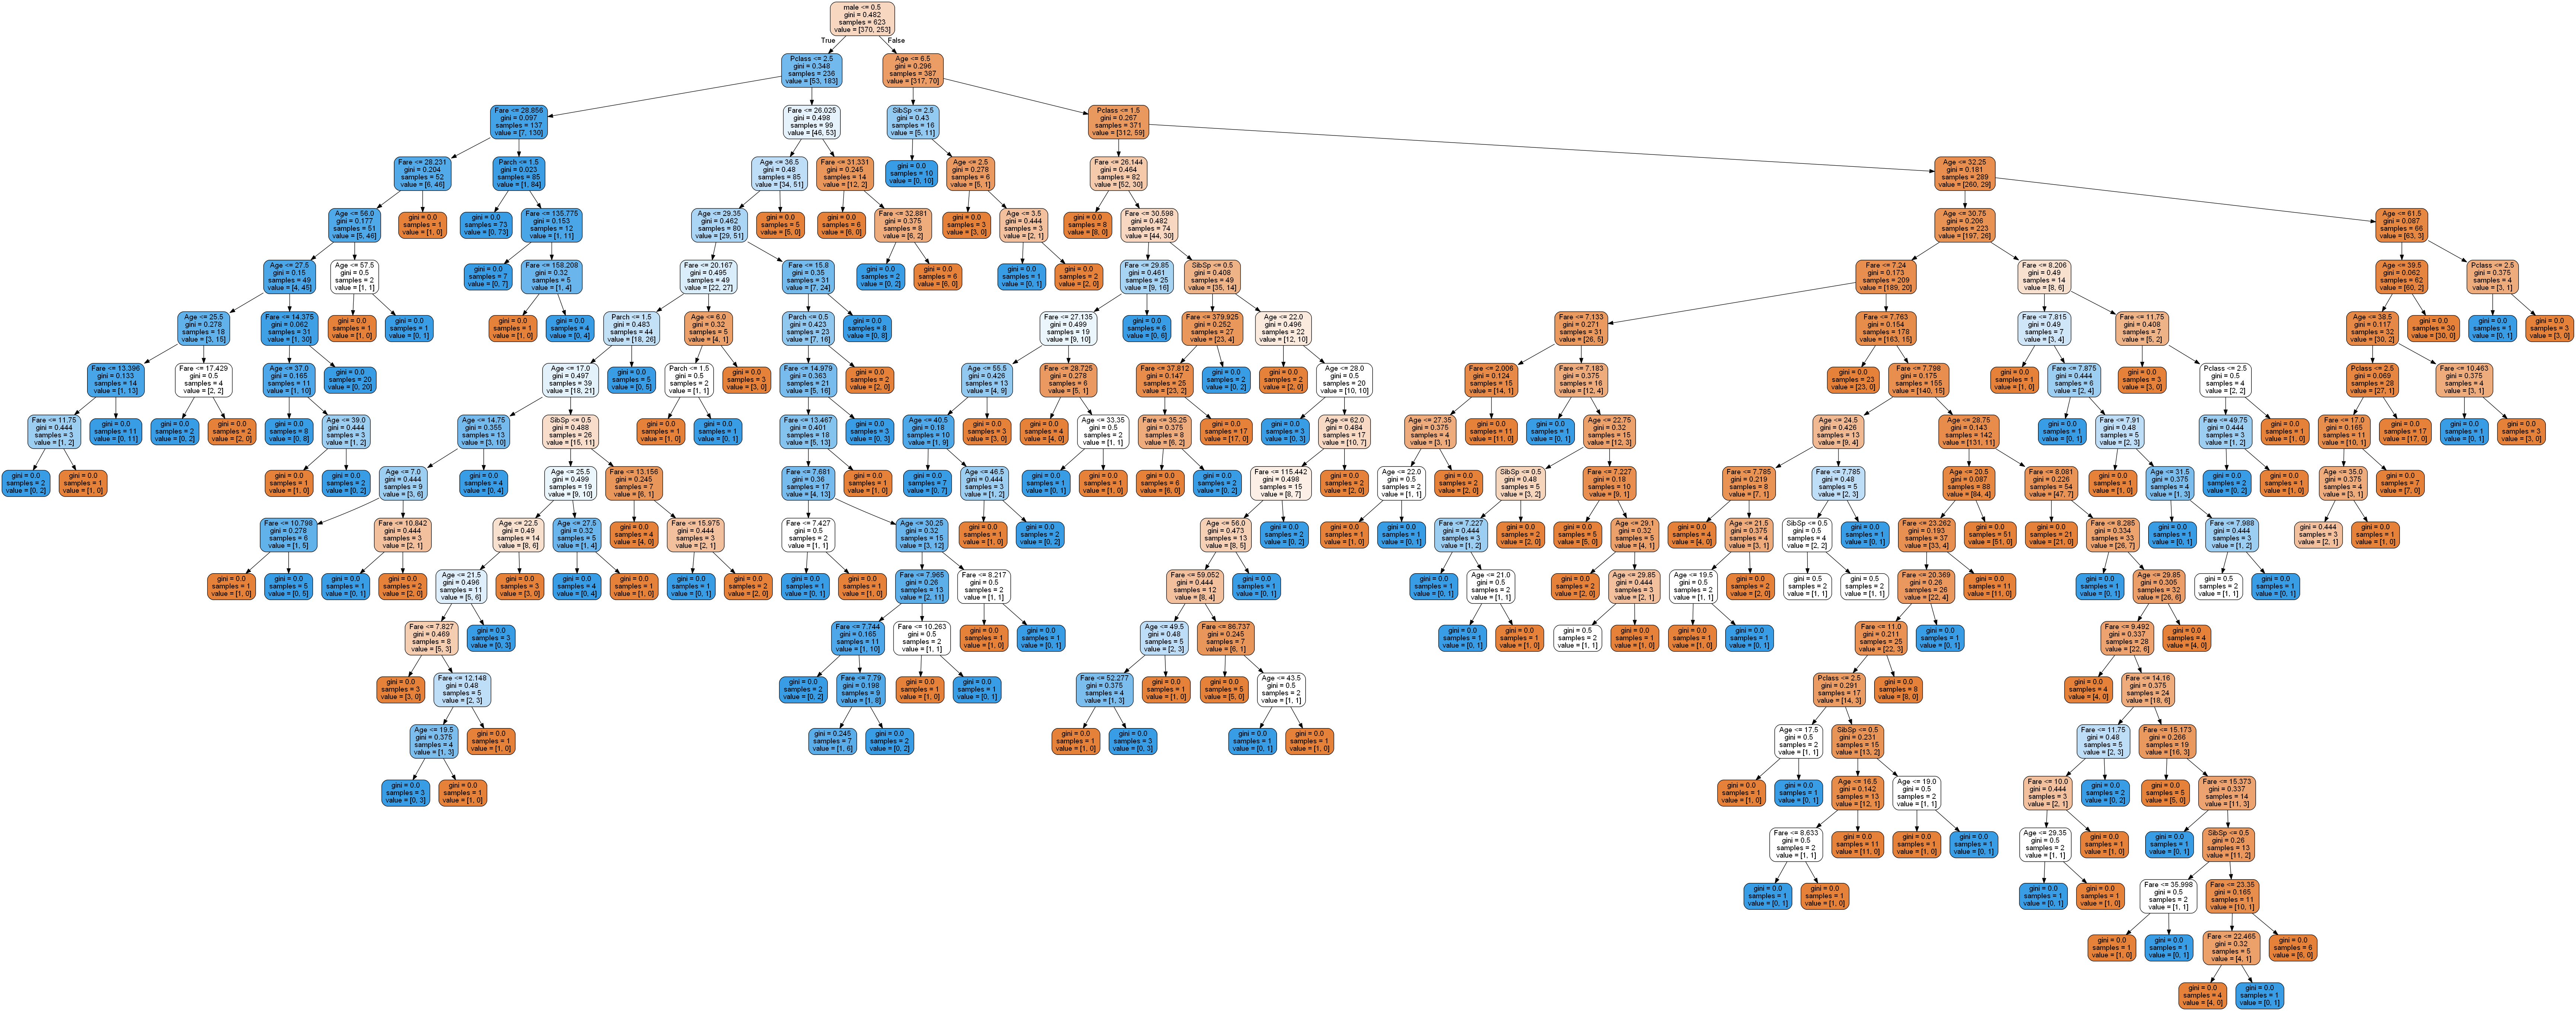

In [47]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(dt,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())
#graph

 Now We do the Hyper parameter tunning


In [48]:
grid_param = {'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    }

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
gridsearc= GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [51]:
gridsearc.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'm

In [52]:
best_para =gridsearc.best_params_
best_para

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'best'}

In [53]:
gridsearc.best_score_

0.8394863563402889

In [57]:
clf1 = DecisionTreeClassifier(criterion = 'gini', max_depth =5, min_samples_leaf= 3, min_samples_split= 3, splitter ='best')
clf1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
clf1.score(x_test,y_test)

0.7761194029850746

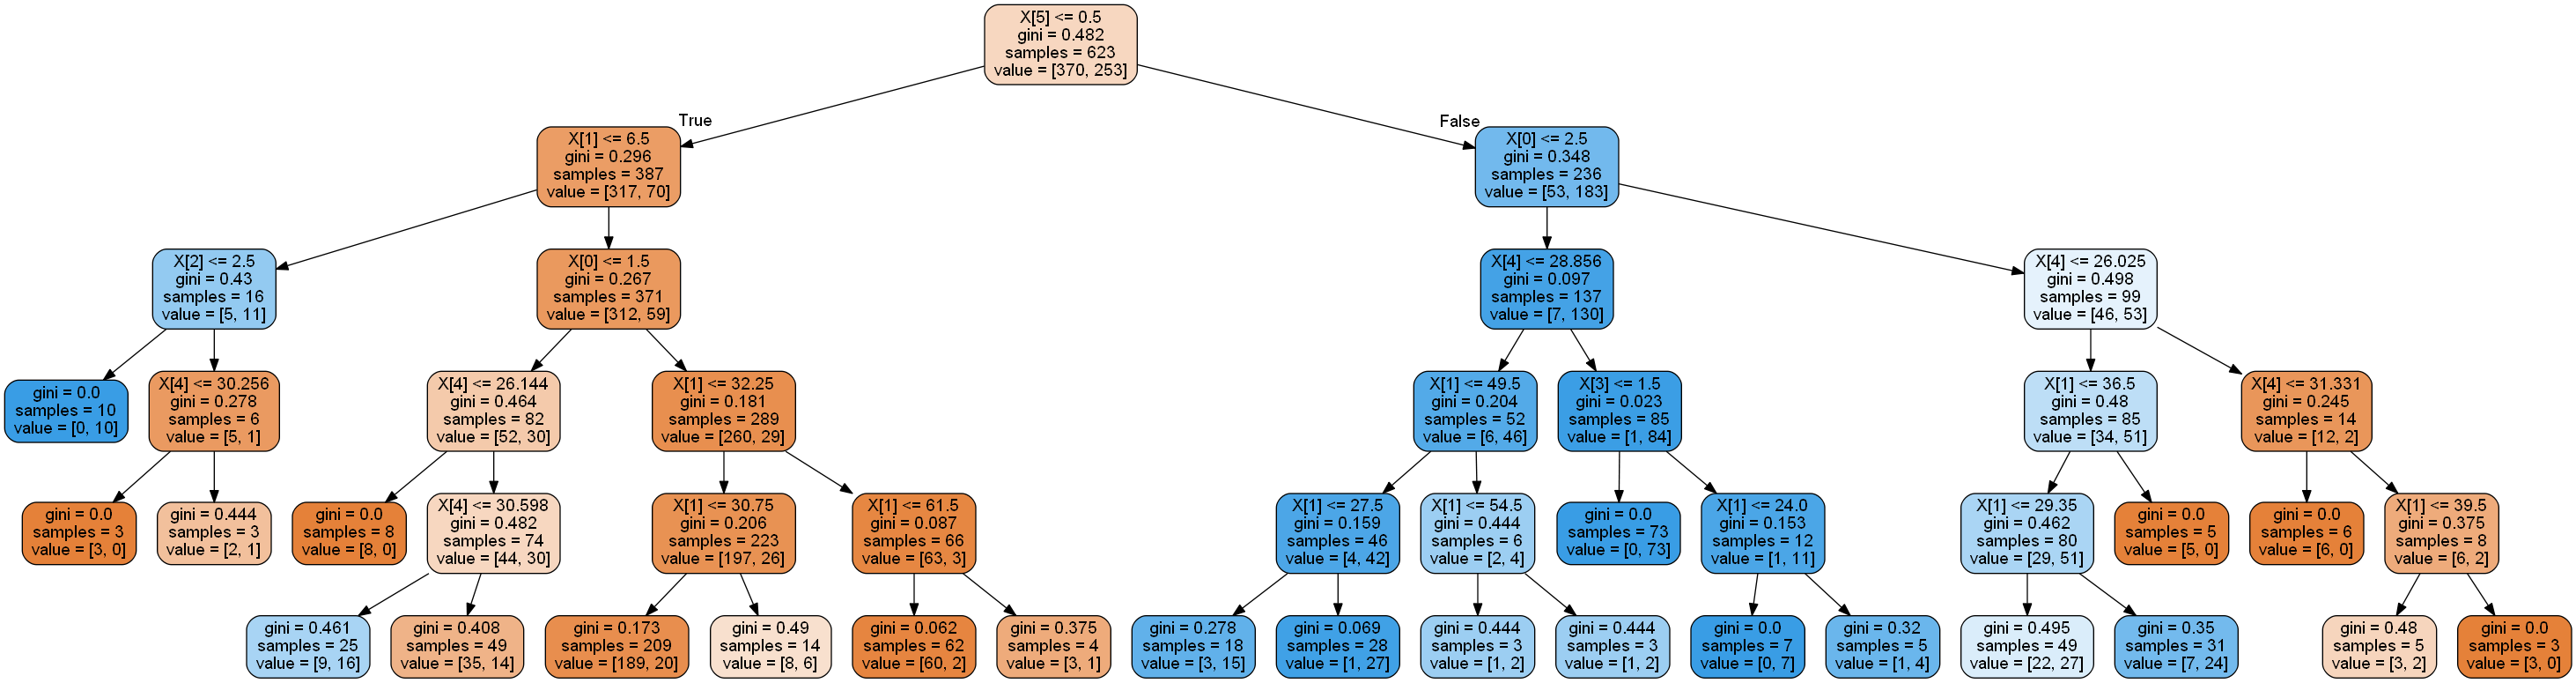

In [59]:
feature_name=list(x.columns)

# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf1,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())